# Quora Insincere Questions Classification:

### AIM: Detect insincere content to improve online conversations

## Problem:
* Handle toxic  content or miseleading content
* To acheive that we have to develop a model that identify insincere questions

## Evaluation:
* For each qid in the testset, predict the corresponding questions_text:

* Is insincere => 1 (Target)

* Is sincere => 0



* metric is F1 Score between the predicted and the observed targets.There are  just two classes, but the positive class makes just over 6% of the total. So the target is heavily unbalanced, which is why a metric such as F1 seems appropriate for this kind of problem.

# Data Features:
* qid : unique question identifer

* question_text : Quora question text

* Target : a question labeled << insincere >> has a value of 1, otherwise 0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(data.shape,test.shape)
data.head()

(1306122, 3) (56370, 2)


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
data.describe()

,target
count,1.306122e+06
mean,6.187018e-02
std,2.409197e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [6]:
data['target'].unique()

array([0, 1], dtype=int64)

In [7]:
data['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [8]:
data.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

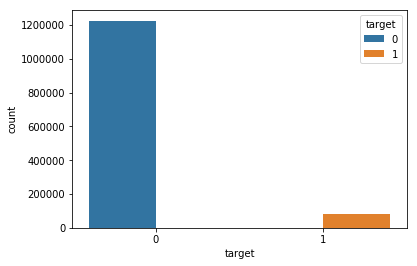

In [19]:

sns.countplot(data=data,x='target',hue='target')


In [10]:
test.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [12]:
print(data.shape,test.shape)

(1306122, 3) (56370, 2)


In [9]:
print(len(data.question_text[data['target'] == 0]),'sincere questions')
print(len(data.question_text[data['target'] == 1]),'unsincere questions')




1225312 sincere questions
80810 unsincere questions


In [10]:
print(len(data.question_text[data['target'] == 0]) / len(data['question_text']) * 100,'percent of sincere')
print(len(data.question_text[data['target'] == 1]) / len(data['question_text']) * 100,'percent of insincere')

93.81298224821265 percent of sincere
6.187017751787352 percent of insincere


In [11]:
data.duplicated(subset={"question_text","qid","Target"}).value_counts()

False    1306122
dtype: int64

# PRE PROCESSING:


In [12]:
import re
# find sentences containing HTML tags
i=0;
for sent in data['question_text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;    

        

8062
Can anyone help me write a VBA code for extracting review comments from PowerPoint 2013 into a table in Word 2013 <see below for further detalis>?


In [37]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
stop = set(stopwords.words('english')) #set of stopwords
a=set(["not","below","did","didn","didn't","does","doesn't","don't"])
stop=stop.difference(a)
sno = nltk.stem.SnowballStemmer('english')
i=0
str1=' '
final_string=[]
s=''
for sent in data['question_text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower()))
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    str1 = ' '.join(filtered_sentence) #final string of cleaned words
    final_string.append(str1)
    i+=1

AttributeError: module 'nltk' has no attribute 'data'

In [13]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer



def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
stop = set(stopwords.words('english')) #set of stopwords
a=set(["not","below","did","didn","didn't","does","doesn't","don't"])
stop=stop.difference(a)
sno = nltk.stem.SnowballStemmer('english')
i=0
str1=' '
final_string=[]
s=''
for sent in data['question_text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower()))
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    str1 = ' '.join(filtered_sentence) #final string of cleaned words
    final_string.append(str1)
    i+=1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naveen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase

i=0
str1=' '
final_string=[]
all_sincere_words=[] # store words from sincere reviews here
all_unsincere_words=[] # store words from unsincere reviews here.
s=''
for sent in data['question_text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (data['target'].values)[i] == '0': 
                        all_sincere_words.append(s) #list of all words used to describe sincere reviews
                    if(data['target'].values)[i] == '1':
                        all_unsincere_words.append(s) #list of all words used to describe unsincere reviews 
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [14]:
data['preprocessedtext']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 

In [15]:
data

,qid,question_text,target,preprocessedtext
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,did quebec nationalist see provinc nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopt dog would encourag peopl adopt not shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,doe veloc affect time doe veloc affect space g...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,did otto von guerick use magdeburg hemispher
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike chang tyre
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0,gaza slowli becom auschwitz dachau treblinka p...
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0,doe quora automat ban conserv opinion report d...
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0,crazi wash wipe groceri germ everywher
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0,thing dress moder differ dress modest
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0,ever phase wherein becam ignor peopl love comp...


In [16]:
sincere=data[data['target']==0]
insincere=data[data['target']==1]

In [17]:
sincere.head()

,qid,question_text,target,preprocessedtext
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,did quebec nationalist see provinc nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopt dog would encourag peopl adopt not shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,doe veloc affect time doe veloc affect space g...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,did otto von guerick use magdeburg hemispher
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike chang tyre


In [19]:
insincere.head()

,qid,question_text,target,preprocessedtext
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1,unit state becom largest dictatorship world
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1,babi sweeter parent dark skin babi light skin ...
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1,black support school choic mandatori sentenc c...
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1,gay boy love cousin boy sexi dont know hot wan...
115,000537213b01fd77b58a,Which races have the smallest penis?,1,race smallest peni


In [20]:
insinprepro=insincere['preprocessedtext']

In [22]:
insinprepro.to_csv("insin_train.csv",header=False)
#print(insincere.head(1))


# WORD CLOUD:

In [20]:
from wordcloud import WordCloud

In [69]:
wordcloud = WordCloud( width=600, height=400).generate(" ".join(data.preprocessedtext[data['target']==1].astype(str)))

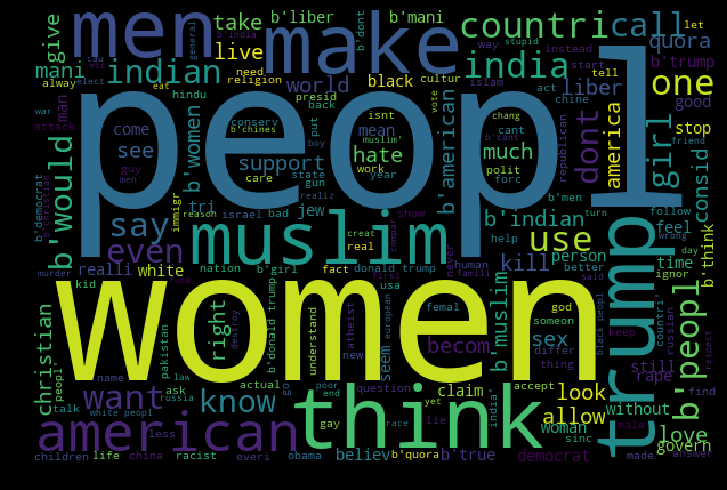

In [70]:
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [72]:
mostfreq=data.preprocessedtext[data['target']==1].astype('str').str.split(expand=True).stack().value_counts()


In [73]:
mostfreq[:10]

peopl     9229
like      5883
trump     4676
women     4057
muslim    3471
get       3467
indian    3111
think     3101
white     2984
men       2915
dtype: int64

In [75]:
wordcloud = WordCloud( width=600, height=400).generate(" ".join(data.preprocessedtext[data['target']==0].astype(str)))

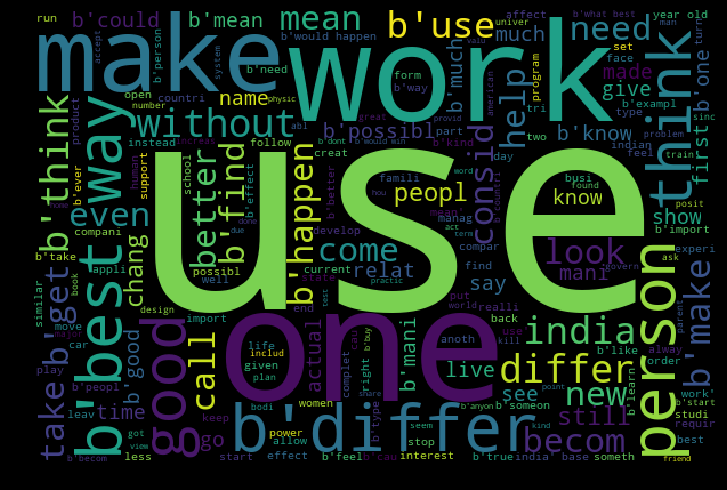

In [76]:
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [74]:
mostfreq=data.preprocessedtext[data['target']==0].astype('str').str.split(expand=True).stack().value_counts()
mostfreq[:10]

b'best     45420
get        45368
like       35255
use        34802
b'would    27878
would      27472
peopl      26064
make       23809
b'get      22602
one        22192
dtype: int64

In [25]:
sincere_lst_len = [len(data['question_text'][i]) for i in range(0, len(data['question_text'][data['target'] == 0])) if data['target'][i] == 0]
sincere_len_mean = np.array(sincere_lst_len).mean()
print("Mean of sincere questions: {:.0f} characters".format(sincere_len_mean))

Mean of sincere questions: 69 characters


In [28]:
unsincere_lst_len = [len(data['question_text'][i]) for i in range(0, len(data['question_text'][data['target'] == 1])) if data['target'][i] == 1]
unsincere_len_mean = np.array(unsincere_lst_len).mean()
print("Mean of unsincere questions: {:.0f} characters".format(unsincere_len_mean))

Mean of unsincere questions: 98 characters


In [26]:
import warnings
warnings.filterwarnings("ignore")

# DISTPLOT:

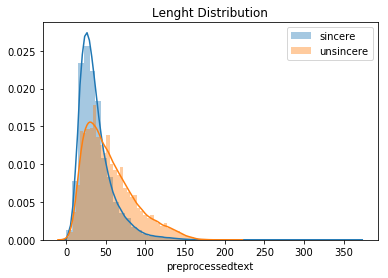

In [27]:
s1 = data[data['target'] == 0]['preprocessedtext'].str.len()
sns.distplot(s1, label='sincere')
s2 = data[data['target'] == 1]['preprocessedtext'].str.len()
sns.distplot(s2, label='unsincere')
plt.title('Lenght Distribution')
plt.legend();

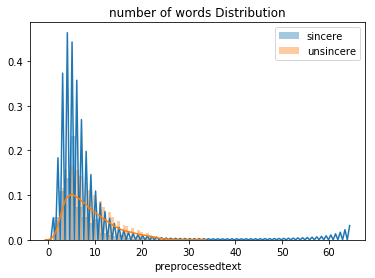

In [28]:
#data["num_sincere words"] 
s1= data.preprocessedtext[data['target']==0].apply(lambda x: len(str(x).split()))
sns.distplot(s1,label='sincere')
#data["num_unsincere words"]
s2= data.preprocessedtext[data['target']==1].apply(lambda x: len(str(x).split()))
sns.distplot(s2,label='unsincere')
plt.title('number of words Distribution')
plt.legend();

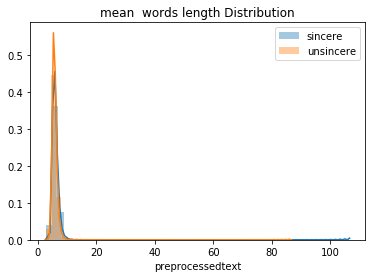

In [29]:
#mean_word_len
s1=data.preprocessedtext[data['target']==0].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
sns.distplot(s1,label='sincere')
#mean_word_len
s2=data.preprocessedtext[data['target']==1].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
sns.distplot(s2,label='unsincere')
plt.title('mean  words length Distribution')
plt.legend();

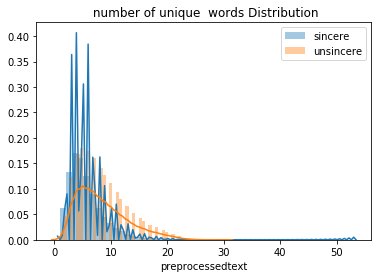

In [30]:
#num_unique_words
s1=data.preprocessedtext[data['target']==0].apply(lambda x: len(set(str(x).split())))
sns.distplot(s1,label='sincere')
#num_unique_words
s2=data.preprocessedtext[data['target']==1].apply(lambda x: len(set(str(x).split())))
sns.distplot(s2,label='unsincere')
plt.title(' number of unique  words Distribution')
plt.legend();


# VIOLINPLOT:

In [36]:
data['length'] = data['preprocessedtext'].str.len()


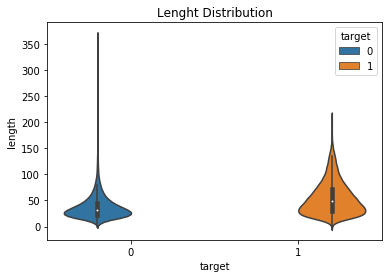

In [47]:
sns.violinplot(data=data,x='target',y='length',hue='target',orient='v')

plt.title('Lenght Distribution')
plt.show()

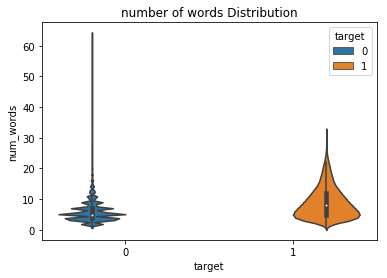

In [48]:
data['num_words'] =data['preprocessedtext'].apply(lambda x: len(str(x).split()))
#data['num_words'] =data.preprocessedtext[data['target']==1].apply(lambda x: len(str(x).split()))
sns.violinplot(data=data,x='target',y='num_words',hue='target',orient='v')
plt.title('number of words Distribution')
plt.show()

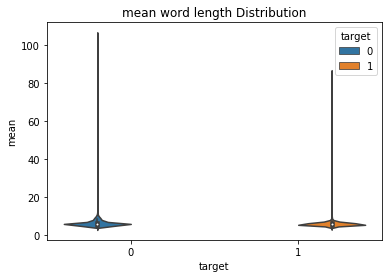

In [45]:
data['mean'] =data['preprocessedtext'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
sns.violinplot(data=data,x='target',y='mean',hue='target',orient='v')
plt.title('mean word length Distribution')
plt.show()

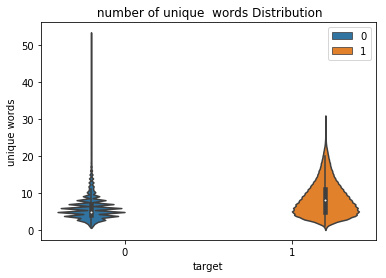

In [53]:
data['unique words']=data['preprocessedtext'].apply(lambda x: len(set(str(x).split())))
sns.violinplot(data=data,x='target',y='unique words',hue='target',orient='v')
plt.title(' number of unique  words Distribution')
plt.legend();

# BOXPLOT:

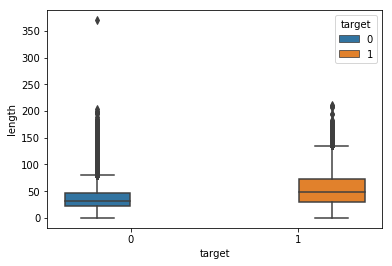

In [49]:
sns.boxplot(data=data,x='target',y='length',hue='target',orient='v')

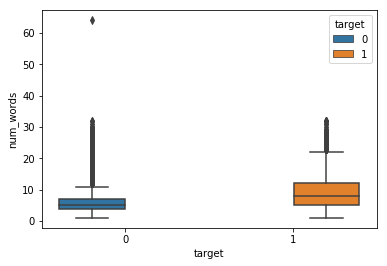

In [51]:
sns.boxplot(data=data,x='target',y='num_words',hue='target',orient='v')

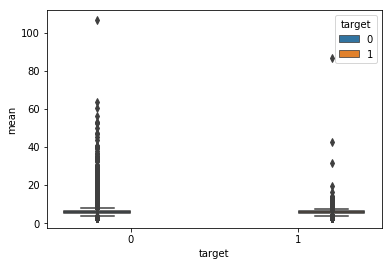

In [52]:
sns.boxplot(data=data,x='target',y='mean',hue='target',orient='v')

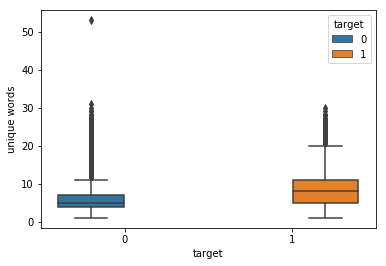

In [54]:
sns.boxplot(data=data,x='target',y='unique words',hue='target',orient='v')

In [ ]:
data["word_count"] = data["question_text"].apply(lambda x: len(str(x).split()))